In [1]:
%config Completer.use_jedi = False
import sys
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import pandas as pd

2023-02-27 13:50:38.229345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 13:50:38.411686: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-27 13:50:39.075981: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /end/home/rh2310/lib:/end/soft/Linux_2.6_64/lib::/end/home/rh2310/.conda/envs/tensorflo

In [38]:
df_params = pd.read_pickle("../../bacterialcolony_dataset3/turing_df_circuit2_variant1_1000000parametersets.pkl")

In [39]:
df_params.head()

,DA,DB,bA,bB,bC,bD,bE,bF,VA,VB,...,nfe,nee,neb,nce,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
404,1.0,0.001,0.01,0.01,0.01,0.01,0.01,0.01,615.268976,73.210081,...,4.0,4.0,4.0,1.0,2.0,"[0.1997, 0.039, 10.9848, 104.771, 244.7529, 3....",stable spiral,turing I oscillatory,0.004898+0.036487j,True
2726,1.0,0.001,0.01,0.01,0.01,0.01,0.01,0.01,228.017071,94.502643,...,4.0,4.0,4.0,1.0,2.0,"[83.3645, 0.276, 12736.8586, 66.0485, 579.5646...",stable spiral,turing I oscillatory,0.000114+0.002647j,True
3508,1.0,0.001,0.01,0.01,0.01,0.01,0.01,0.01,23.538028,320.885489,...,4.0,4.0,4.0,1.0,3.0,"[6.9465, 0.1825, 57.5198, 3.3825, 131.0374, 1....",stable spiral,turing I oscillatory,0.001639+0.132134j,True
7516,1.0,0.001,0.01,0.01,0.01,0.01,0.01,0.01,16.205693,83.166774,...,4.0,4.0,4.0,1.0,1.0,"[1.7525, 0.2247, 908.552, 10.6864, 225.1614, 2...",stable spiral,turing I oscillatory,0.000652+0.003066j,True
7883,1.0,0.001,0.01,0.01,0.01,0.01,0.01,0.01,85.164519,738.495294,...,4.0,4.0,4.0,1.0,2.0,"[2.8165, 0.0136, 82.5102, 2.7508, 154.2711, 3....",stable spiral,turing I oscillatory,0.001346+0.016362j,True


In [94]:
df_params.loc[15696,:]
#df_params.loc[89851,:]

DA                                                                  1.0
DB                                                                0.001
bA                                                                 0.01
bB                                                                 0.01
bC                                                                 0.01
bD                                                                 0.01
bE                                                                 0.01
bF                                                                 0.01
VA                                                            10.332731
VB                                                           654.848577
VC                                                             35.33654
VD                                                           191.336673
VE                                                            13.796571
VF                                                            11

In [95]:
df_params.columns

Index(['DA', 'DB', 'bA', 'bB', 'bC', 'bD', 'bE', 'bF', 'VA', 'VB', 'VC', 'VD',
       'VE', 'VF', 'Kda', 'Kab', 'Keb', 'Kbd', 'Kfe', 'Kee', 'Kce', 'muLVA',
       'muASV', 'nbd', 'nab', 'nda', 'nfe', 'nee', 'neb', 'nce', 'ss_n',
       'ss_list', 'ss_class', 'system_class', 'maxeig', 'complex_dispersion'],
      dtype='object')

In [97]:
import pickle
ID = 15696#15696#546780
with open(f"../../bacterialcolony_dataset3/2Dfinal_circuit2_variant1_bc1.7_ca_ID{ID}_L8_J160_T125_N2500.pkl", 'rb') as f:
    ds_1 = pickle.load(f)

In [98]:
len(ds_1)

6

In [99]:
ds_1.shape

(6, 160, 160)

In [100]:
ds_1[0].shape

(160, 160)

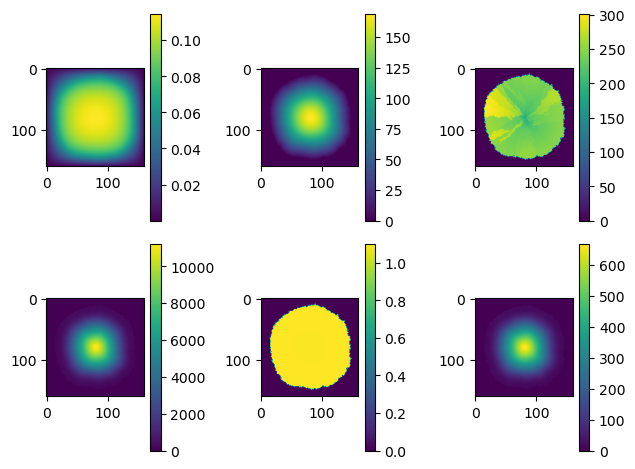

In [101]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(ds_1[i,:,:])
    plt.colorbar()
plt.tight_layout()
plt.show()

In [102]:
ds_1[-1,:,:].shape

(160, 160)

In [103]:
def normaisied(arr):
    min_v = np.min(arr)
    max_v = np.max(arr)
    return (arr - min_v)/(max_v - min_v)

(-0.5, 159.5, 159.5, -0.5)

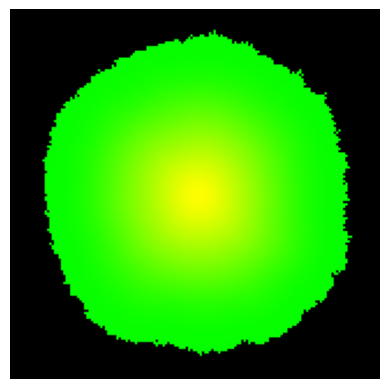

In [104]:
green = ds_1[-1,:,:]
red = ds_1[-2,:,:]
norm_green = normaisied(green)
norm_red = normaisied(red)
field = np.dstack((norm_green, norm_red, np.zeros_like(norm_green)))
plt.imshow(field)
plt.axis('off')

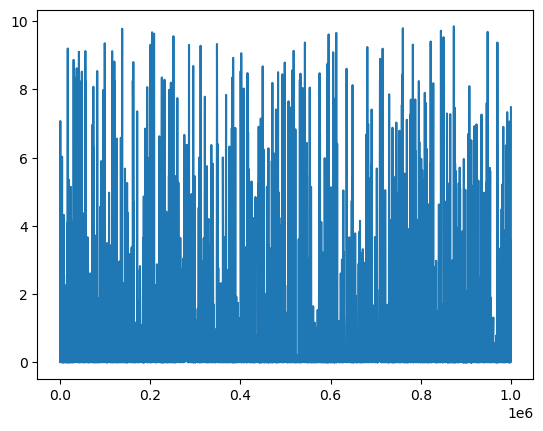

In [25]:
plt.plot(df_params.DB)